In [93]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [94]:
# -----------------------------
# 2. Data Preprocessing
# -----------------------------
data = """The speed of transmission is an important point of difference between the two viruses. 
Influenza has a shorter median incubation period the time from infection to appearance of symptoms 
and a shorter serial interval the time between successive cases than COVID 19 virus. 
The serial interval for COVID 19 virus is estimated to be 5 6 days while for influenza virus  
the serial interval is 3 days. This means that influenza can spread faster than COVID-19."""

sentences = data.lower().split('.')
# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

vocab_size = len(tokenizer.word_index) + 1
word_to_index = tokenizer.word_index
index_to_word = {v: k for k, v in word_to_index.items()}

In [95]:
# -----------------------------
# 3. Create Training Data (Context → Target)
# -----------------------------
context_size = 2
contexts, targets = [], []

for seq in sequences:
    for i in range(context_size, len(seq) - context_size):
        target = seq[i]
        context = [seq[i - 2], seq[i - 1], seq[i + 1], seq[i + 2]]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
Y = np.array(targets)

In [96]:
# -----------------------------
# 4. Build Model
# -----------------------------
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=20, input_length=4),
    layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
# -----------------------------
# 5. Train Model
# -----------------------------
history = model.fit(X, Y, epochs=100, verbose=0)

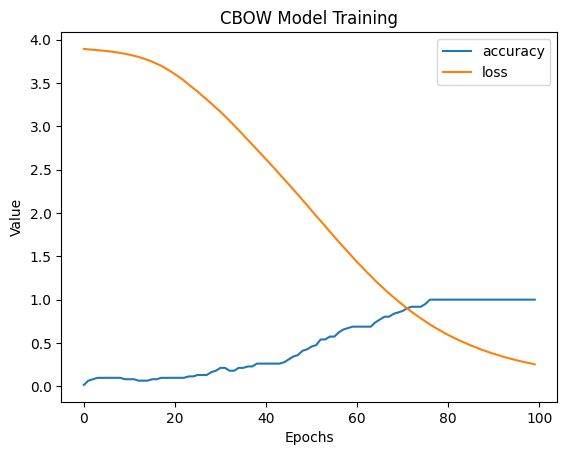


Word Embeddings:

[[ 3.32238115e-02  3.48574407e-02  4.23635356e-02  7.25711510e-03
  -1.61865577e-02 -3.36526185e-02  1.78810842e-02  2.79799588e-02
  -1.36170015e-02 -6.66878372e-03  3.49177159e-02  4.55633514e-02
  -1.82978287e-02  1.35261528e-02 -4.62718494e-02 -3.29524279e-03
   4.84146364e-02 -1.53213739e-02 -4.05511856e-02  2.74754800e-02]
 [-2.21703023e-01 -1.37159839e-01 -2.07198963e-01 -1.67494267e-01
   2.98122793e-01  1.62659496e-01  4.50403094e-02 -2.97584832e-01
  -3.69653583e-01 -1.89538464e-01 -2.63208687e-01 -2.31641501e-01
  -1.67894363e-01 -2.15330899e-01  3.95120159e-02  6.21546023e-02
   8.43110606e-02 -1.64806947e-01 -1.47718117e-01 -2.60595173e-01]
 [-2.17539534e-01 -8.57059956e-02  2.04136819e-01  6.80551082e-02
  -8.72550979e-02  5.05115874e-02 -2.43884236e-01 -3.06765437e-01
  -8.10010880e-02 -2.74463773e-01  2.21600786e-01  2.03086838e-01
   9.50788260e-02 -1.18842497e-01 -4.73481178e-01  2.12974563e-01
   3.64577204e-01 -2.04300582e-01  3.95037234e-03  1.83

In [98]:
# -----------------------------
# 6. Plot Accuracy & Loss
# -----------------------------
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title("CBOW Model Training")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()


# -----------------------------
# 8. Display Word Embeddings
# -----------------------------
embeddings = model.layers[0].get_weights()[0]  # Get the embedding matrix

print("\nWord Embeddings:\n")
print(embeddings)

In [99]:
# Pick a random example
i = np.random.randint(0, len(contexts))

# Get context and target
context = np.array(contexts[i])  # Convert to NumPy array
target = targets[i]

# Show context words
print("Context Words:", [index_to_word[w] for w in context])

# Show actual word
print("Actual Target Word:", index_to_word[target])

# Predict using model
pred = model.predict(context.reshape(1, -1))  # reshape to (1, 4)
predicted = np.argmax(pred)

# Show predicted word
print("Predicted Target Word:", index_to_word[predicted])



Context Words: ['virus', 'is', 'to', 'be']
Actual Target Word: estimated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Predicted Target Word: estimated
